# Fermat-Weber Problem

In [35]:
from gurobipy import GRB, Model, quicksum
import matplotlib.pyplot as plt
import numpy as np

## Generate Input Data

In [36]:
np.random.seed(19680801)

N = 100
X1 = 100*np.random.rand(N)
X2 = 100*np.random.rand(N)
X = [tuple(x) for x in zip(X1, X2)]

with open('fermat-weber.csv', 'w+') as f:
    f.write('X1,X2\n')
    for (x1, x2) in X:
        f.write(f'{x1},{x2}\n')

num_points = range(1, N+1)
axes = [0, 1]

## Optimization Model

In [37]:
m = Model('Fermat-Weber')

x = m.addVars(axes, name='x')
w = m.addVars(num_points, name='w')
v = m.addVars(num_points, axes, name='v', lb=-GRB.INFINITY)

m.addConstr(((x[0]-30)*(x[0]-30)+(x[1]-40)*(x[1]-40) <= 49), name='Respect feasible construction region')
m.addConstrs((v[i, j] == x[j]-X[i-1][j] for i in num_points for j in axes), name='Definition v')
m.addConstrs((
    quicksum(v[i, j]*v[i, j] for j in axes) <= w[i]*w[i] for i in num_points
), name='SOC: Distance to regional warehouse')
m.setObjective(w.sum(), sense=GRB.MINIMIZE)

m.optimize()

if m.Status == 4:
    m.Params.DualReductions = 0
    m.optimize()
if m.Status == 3:
    m.computeIIS()
    m.write('IIS.ilp')

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 200 rows, 302 columns and 400 nonzeros
Model fingerprint: 0x6c75084f
Model has 101 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [6e+01, 8e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-01, 1e+02]
  QRHS range       [2e+03, 2e+03]
Presolve time: 0.00s
Presolved: 204 rows, 304 columns, 407 nonzeros
Presolved model has 101 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ     : 5.090e+02
 Factor NZ  : 9.210e+02
 Factor Ops : 4.173e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.25481797e+04  0.00000000e+00  1.73e+02 4.77e-01  7.48e+01     0s
   1   6.18047330e+03  9.85605726e+02  2.67e+01 2.74

In [38]:
xopt = round(x[0].X, 2)
yopt = round(x[1].X, 2)
print(f'x: {xopt}, y: {yopt}')

x: 36.28, y: 43.1


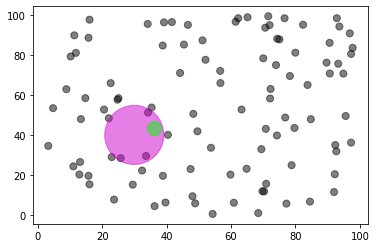

In [39]:
# Add feasible region
x_list = np.append(X1, 30)
y_list = np.append(X2, 40)

colors = [[0, 0, 0]] * N
colors.append([0.8, 0, 0.8])
area = (50 * np.ones(N))**1  # 0 to 15 point radii
area = np.append(area, 3500)
area = np.append(area, 200)

#plt.scatter(x_list, y_list, s=area, c=colors, alpha=0.5)
#plt.savefig('feasible-region.png')
#plt.clf()
# Add optimization result
x_list = np.append(x_list, xopt)
y_list = np.append(y_list, yopt)
colors.append([0, 1, 0])
plt.scatter(x_list, y_list, s=area, c=colors, alpha=0.5)
plt.savefig('opt-result.png')

plt.show()